<a href="https://colab.research.google.com/github/mateuspalacio/grupo_four_jupyter/blob/main/AV3GerImpSis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from math import sqrt
from datetime import date, timedelta
import tensorflow as tf
import os
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
path = os.path.join('drive/My Drive/vgsales.csv')
df_data = pd.read_csv(path)


nan_value = float("NaN")


df_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df_data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


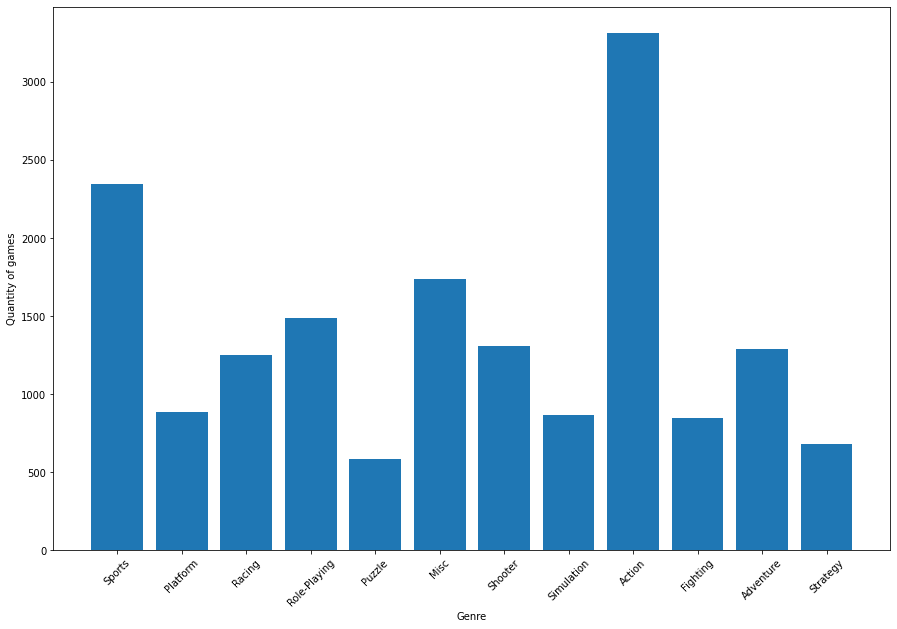

In [5]:
acc = {}
for x in df_data['Genre']:
    if x in acc:
        acc[x] = acc[x] + 1
    else:
        acc[x] = 1
x = acc.keys()
y = acc.values()
fig=plt.figure(figsize=(15,10))
plt.bar(range(len(acc)), list(acc.values()), align='center')
plt.xticks(range(len(acc)), list(acc.keys()))
plt.xticks(rotation=45)
# colocar labels plt.xlabel()
plt.xlabel("Genre")
plt.ylabel("Quantity of games")
plt.show()

## Dividindo os datasets por gênero

In [6]:
df_data_c0=df_data[df_data['Genre']=='Action']
df_data_c1=df_data[df_data['Genre']=='Sports']
df_data_c2=df_data[df_data['Genre']=='Role-Playing']
df_data_c3=df_data[df_data['Genre']=='Racing']
df_data_c4=df_data[df_data['Genre']=='Misc']
df_data_c5=df_data[df_data['Genre']=='Adventure']


In [7]:
df_data_gta=df_data_c0[df_data_c0['Name'] == 'Grand Theft Auto V']
df_gta_features = df_data_gta.drop(columns=['Rank', 'Name', 'Genre', 'Publisher'])

df_gta_features

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS3,2013.0,7.01,9.27,0.97,4.14,21.40
23,X360,2013.0,9.63,5.31,0.06,1.38,16.38
44,PS4,2014.0,3.80,5.81,0.36,2.02,11.98
197,XOne,2014.0,2.66,2.01,0.00,0.41,5.08
1896,PC,2015.0,0.36,0.64,0.00,0.08,1.08


### Porcentagem de vendas globais por plataforma para GTA V

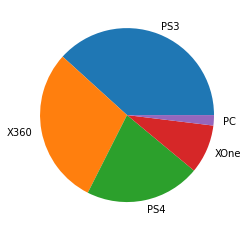

In [8]:
acc_plat_gta = {}

for x in df_data_gta['Global_Sales']:
    if x in acc_plat_gta:
        acc_plat_gta[x] = acc_plat_gta[x] + 1
    else:
        acc_plat_gta[x] = 1
Total = df_data_gta['Global_Sales'].sum()
plt.pie([x/Total for x in acc_plat_gta.keys()],labels=df_data_gta['Platform'])
plt.show()

### Vendas por plataforma por continente para GTA V.

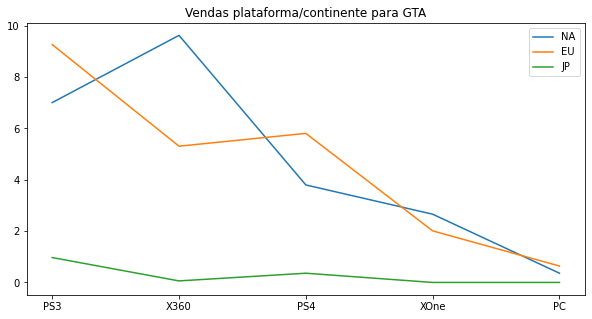

In [16]:
x = df_gta_features['Platform']
y = df_gta_features['NA_Sales']
z = df_gta_features['EU_Sales']
k = df_gta_features['JP_Sales']
fig = plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.plot(x, z)
plt.plot(x, k)
plt.title('Vendas plataforma/continente para GTA')
plt.legend(['NA', 'EU', 'JP'])
plt.show()

## Vendas para cada continente

### Vendas na América do Norte

In [11]:
df_data_na=df_data.drop(columns=['Rank',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

df_data_na

,Name,Platform,Year,Genre,Publisher,NA_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27
...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00


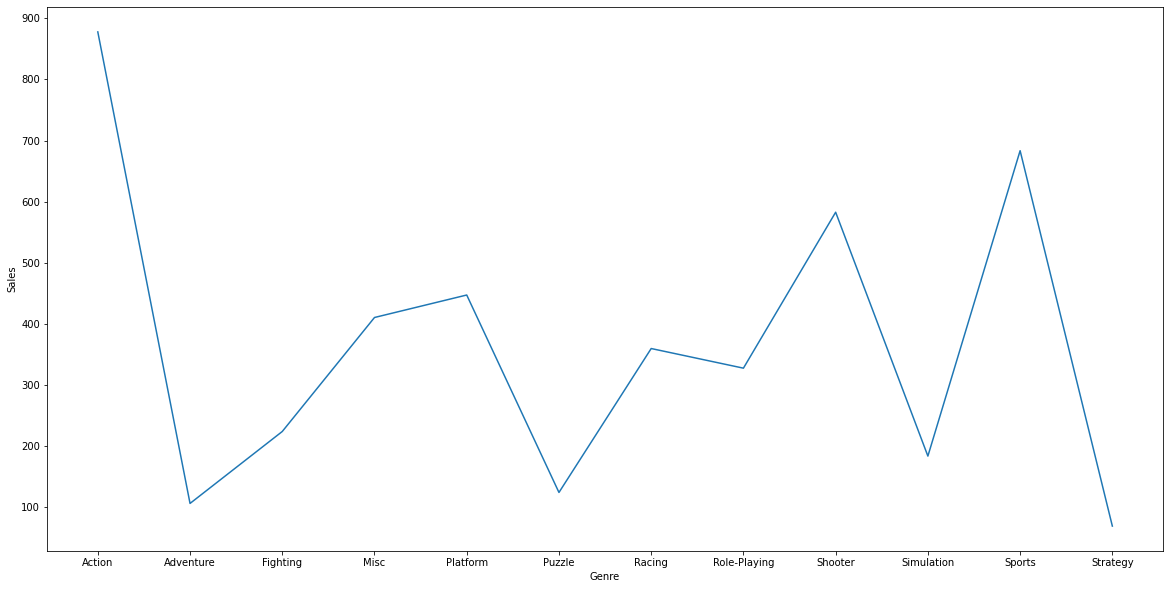

In [38]:
gf = (df_data_na['NA_Sales']).groupby(df_data_na['Genre']).sum().reset_index(name='NA_Sales')
fig = plt.figure(figsize=(20,10))
plt.plot(gf['Genre'], gf['NA_Sales'])
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

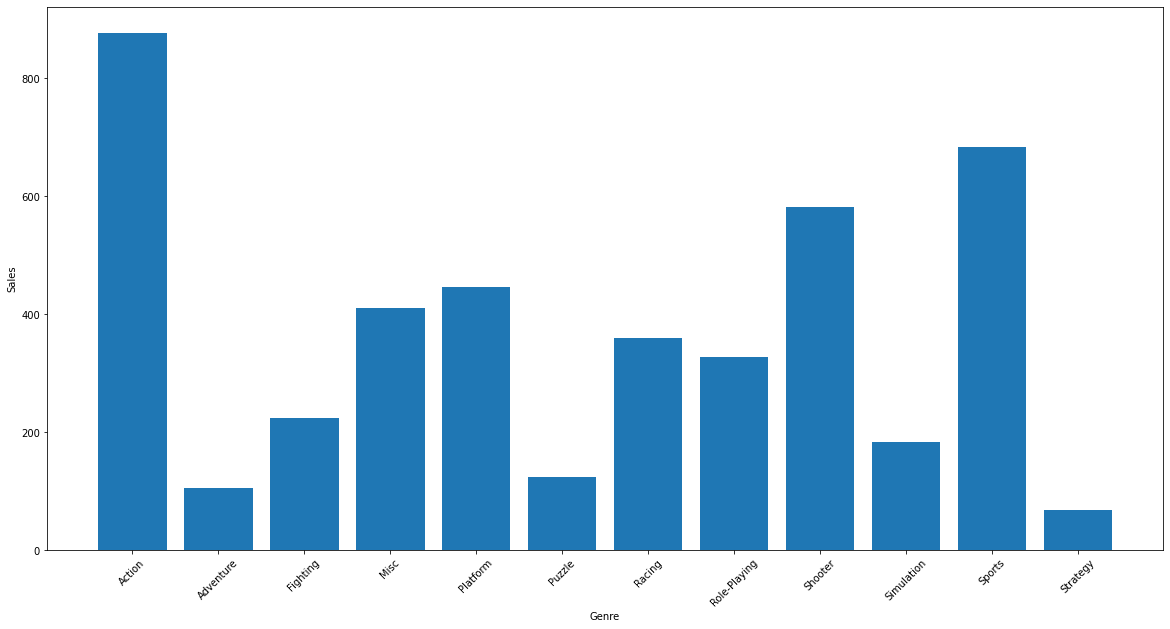

In [36]:
fig=plt.figure(figsize=(20,10))
plt.bar(gf['Genre'], gf['NA_Sales'], align='center')
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.show()

### Vendas na União Européia

In [41]:
df_data_eu=df_data.drop(columns=['Rank',
       'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])

df_data_eu

,Name,Platform,Year,Genre,Publisher,EU_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,29.02
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,3.58
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,12.88
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,11.01
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,8.89
...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.00
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.00
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.01


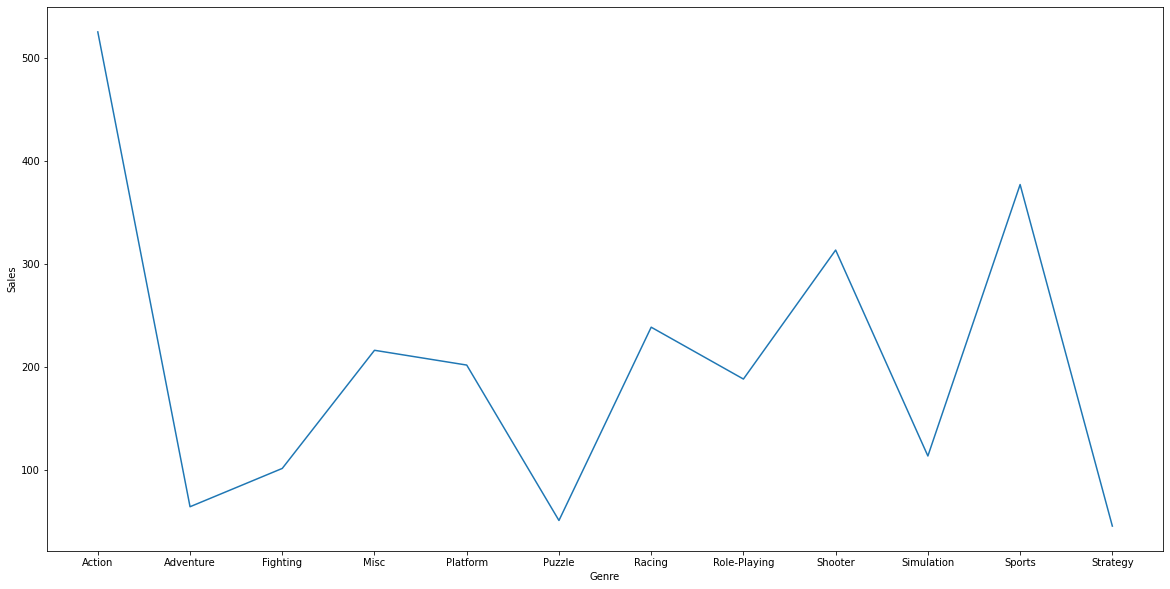

In [42]:
gf_eu = (df_data_eu['EU_Sales']).groupby(df_data_eu['Genre']).sum().reset_index(name='EU_Sales')
fig = plt.figure(figsize=(20,10))
plt.plot(gf_eu['Genre'], gf_eu['EU_Sales'])
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

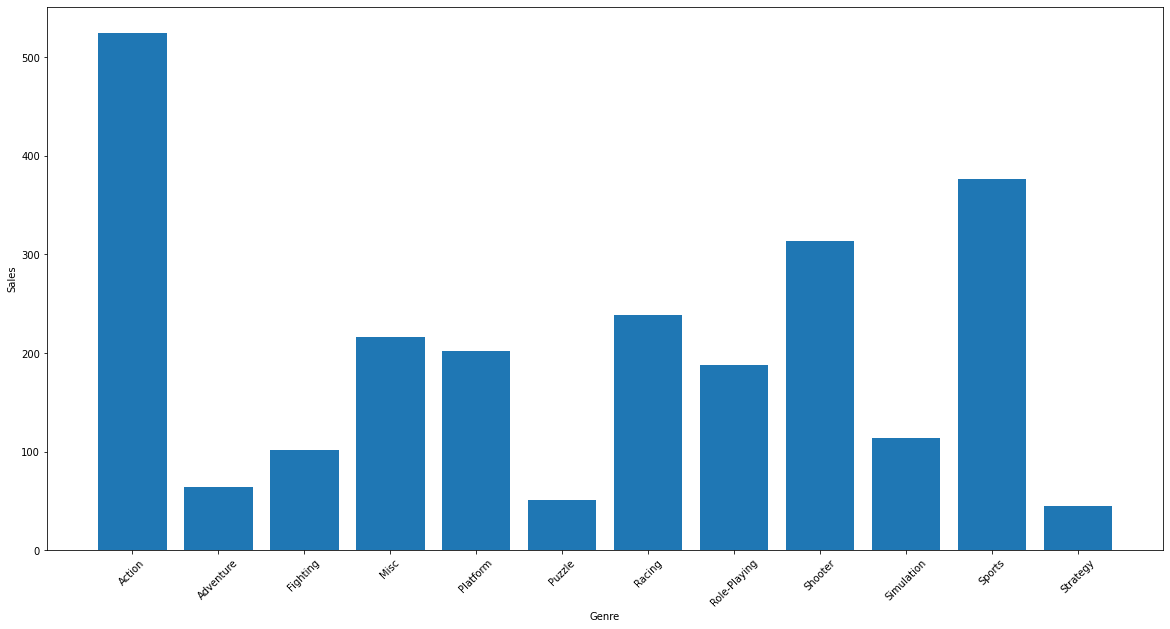

In [43]:
fig=plt.figure(figsize=(20,10))
plt.bar(gf_eu['Genre'], gf_eu['EU_Sales'], align='center')
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.show()

### Vendas no Japão

In [44]:
df_data_jp=df_data.drop(columns=['Rank',
       'NA_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales'])

df_data_jp

,Name,Platform,Year,Genre,Publisher,JP_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22
...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.00
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.00
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00


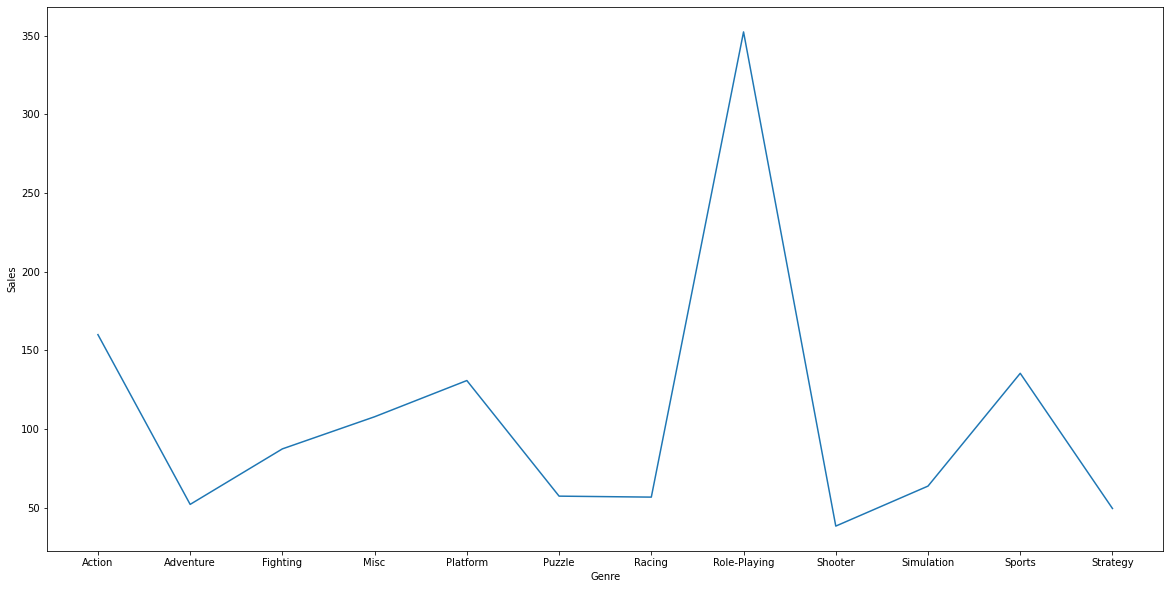

In [45]:
gf_jp = (df_data_jp['JP_Sales']).groupby(df_data_jp['Genre']).sum().reset_index(name='JP_Sales')
fig = plt.figure(figsize=(20,10))
plt.plot(gf_jp['Genre'], gf_jp['JP_Sales'])
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

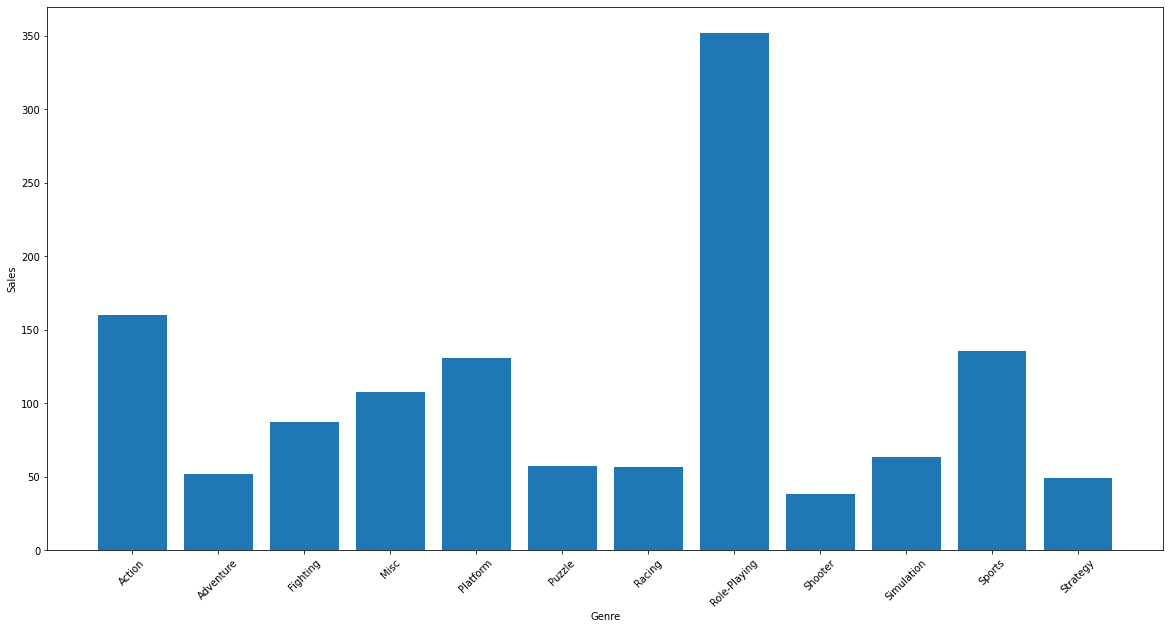

In [46]:
fig=plt.figure(figsize=(20,10))
plt.bar(gf_jp['Genre'], gf_jp['JP_Sales'], align='center')
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.show()

### Comparando os três continentes

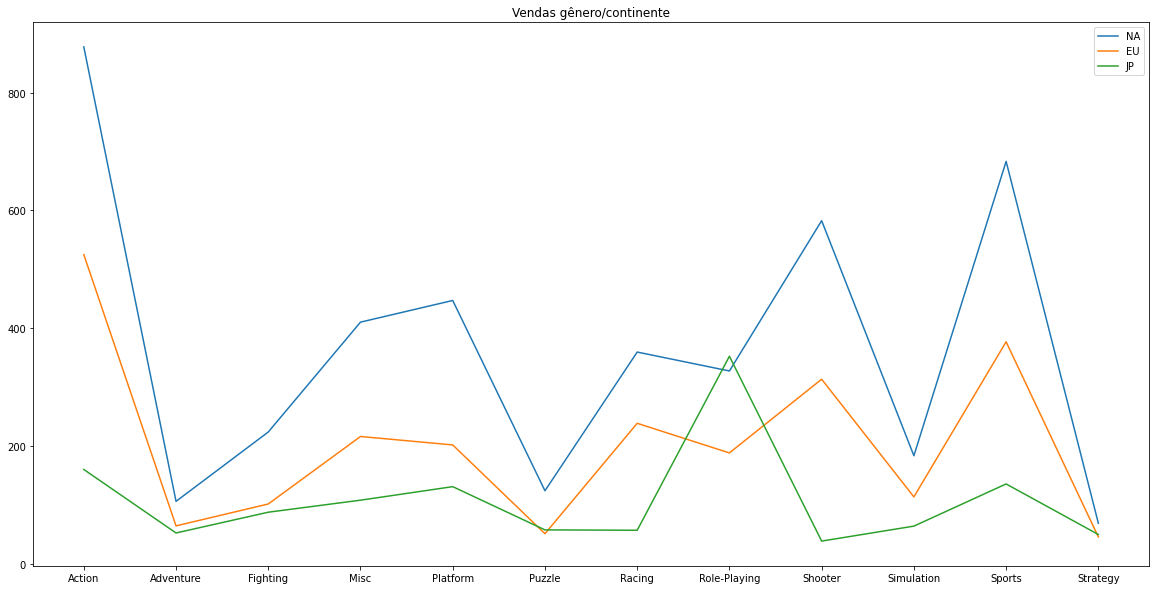

In [48]:
x = gf['Genre']
y = gf['NA_Sales']
z = gf_eu['EU_Sales']
k = gf_jp['JP_Sales']
fig = plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.plot(x, z)
plt.plot(x, k)
plt.title('Vendas gênero/continente')
plt.legend(['NA', 'EU', 'JP'])
plt.show()

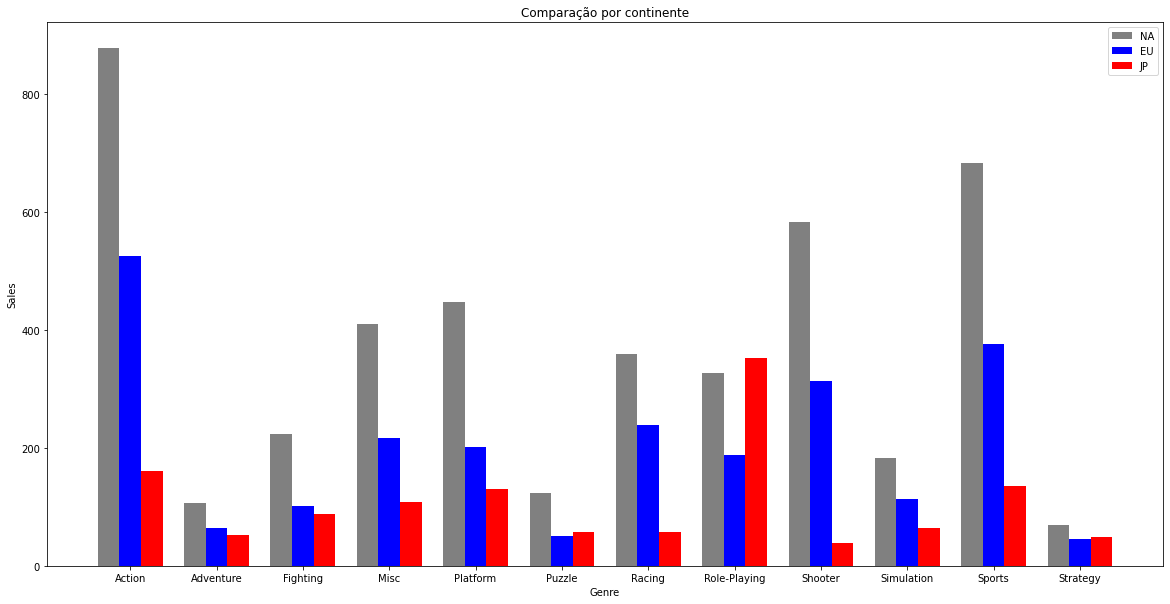

In [66]:
fig = plt.figure(figsize=(20,10))

x_values1 = [0.5,2.5,4.5,6.5,8.5,10.5,12.5,14.5,16.5,18.5,20.5,22.5]
x_values2 = [1.0,3.0,5.0,7.0,9.0,11.0,13.0,15.0,17.0,19.0,21.0,23.0]
x_values3 = [1.5,3.5,5.5,7.5,9.5,11.5,13.5,15.5,17.5,19.5,21.5,23.5]
width=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

# Subplot configuration:
ax = plt.subplot()
ax.set_xticks(range(1,30,2))

ax.set_xticklabels(gf['Genre'])

plt.bar(x_values1, gf['NA_Sales'], color='grey', width=width)
plt.bar(x_values2, gf_eu['EU_Sales'], color='blue', width=width)
plt.bar(x_values3, gf_jp['JP_Sales'], color='red', width=width)
# Display plot:
plt.title("Comparação por continente")
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.legend(['NA', 'EU', 'JP'])
plt.show()

## Vendas para um gênero

### Vendas por jogo de ação

In [67]:
df_data_c0

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...
16564,16567,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007.0,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16582,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01
16583,16586,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01


In [70]:
groupbygame = (df_data_c0['Global_Sales']).groupby(df_data_c0['Name']).sum().reset_index(name='Global_Sales')
groupbygame_na = (df_data_c0['NA_Sales']).groupby(df_data_c0['Name']).sum().reset_index(name='NA_Sales')
groupbygame_jp = (df_data_c0['JP_Sales']).groupby(df_data_c0['Name']).sum().reset_index(name='JP_Sales')
groupbygame_eu = (df_data_c0['EU_Sales']).groupby(df_data_c0['Name']).sum().reset_index(name='EU_Sales')

groupbygame

,Name,Global_Sales
0,.hack: Sekai no Mukou ni + Versus,0.03
1,007: Quantum of Solace,3.92
2,007: The World is not Enough,2.47
3,1001 Touch Games,0.33
4,2 Games in 1 Double Pack: The Incredibles / Fi...,1.76
...,...,...
1920,[Prototype 2],1.65
1921,[Prototype],2.55
1922,inFAMOUS,2.94
1923,inFAMOUS 2,1.85


In [79]:
# getting top 10 per continent
top10_global = groupbygame.nlargest(10, 'Global_Sales')
top10_na = groupbygame_na.nlargest(10, 'NA_Sales')
top10_jp = groupbygame_jp.nlargest(10, 'JP_Sales')
top10_eu = groupbygame_eu.nlargest(10, 'EU_Sales')

,Name,JP_Sales
1202,Pokemon HeartGold/Pokemon SoulSilver,3.96
1036,Monster Hunter X,2.78
1899,Yokai Watch Busters,2.28
1284,Resident Evil 2,2.09
1668,The Legend of Zelda: Ocarina of Time,2.07
1661,The Legend of Zelda,1.69
1286,Resident Evil 3: Nemesis,1.54
1663,The Legend of Zelda: A Link to the Past,1.48
864,Kung Fu,1.42
1280,Resident Evil,1.40


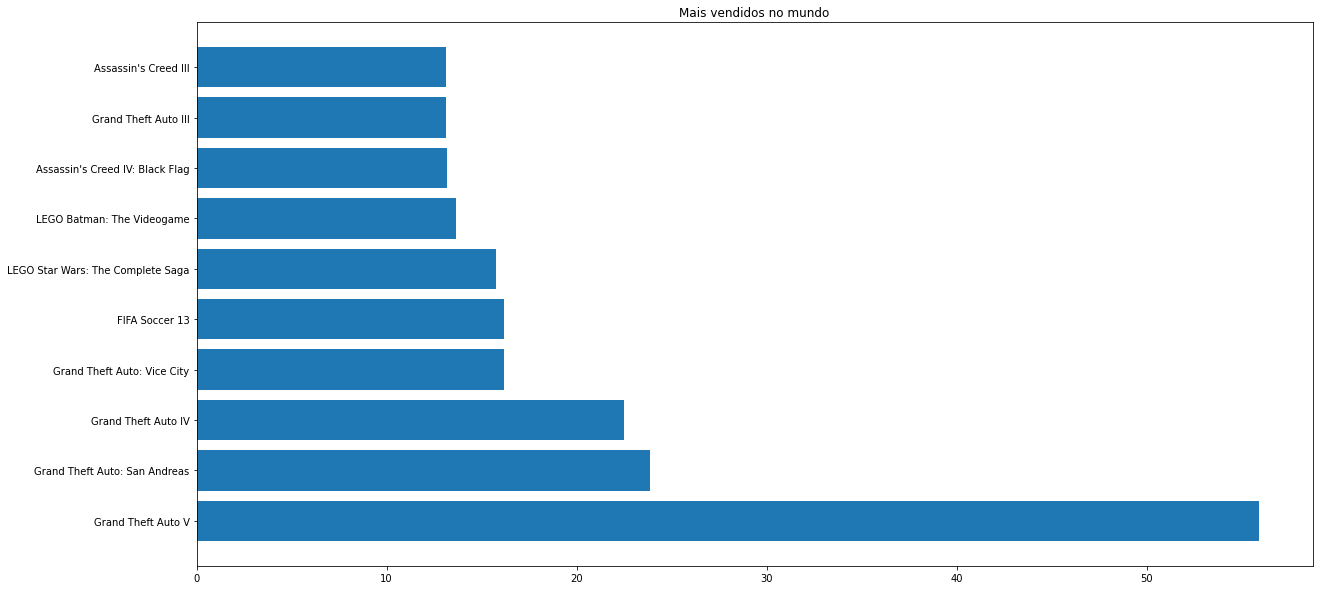

In [83]:
x = top10_global['Name']
y = top10_global['Global_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos no mundo')
plt.show()

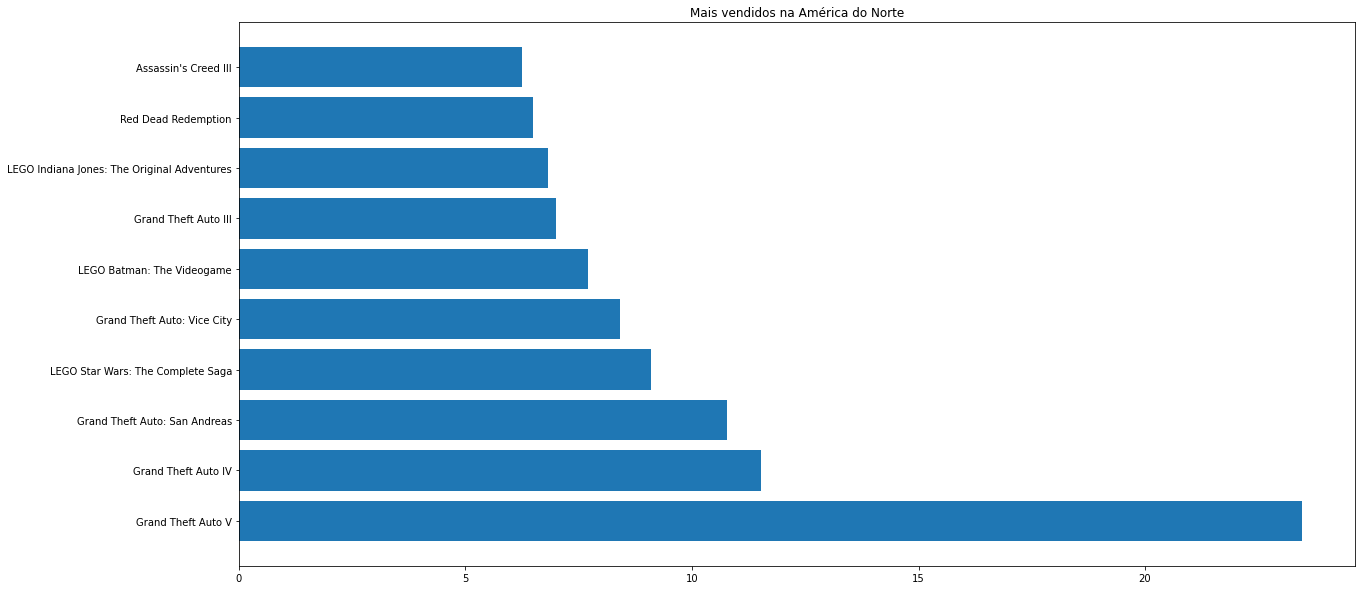

In [85]:
x = top10_na['Name']
y = top10_na['NA_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos na América do Norte')
plt.show()

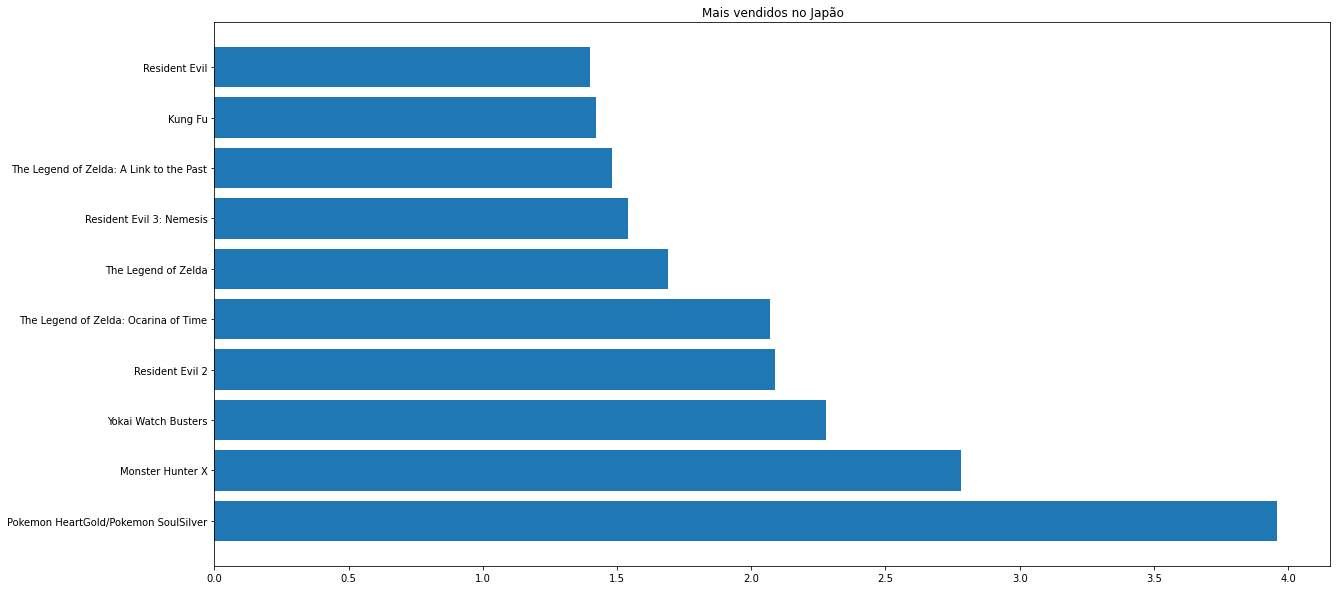

In [86]:
x = top10_jp['Name']
y = top10_jp['JP_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos no Japão')
plt.show()

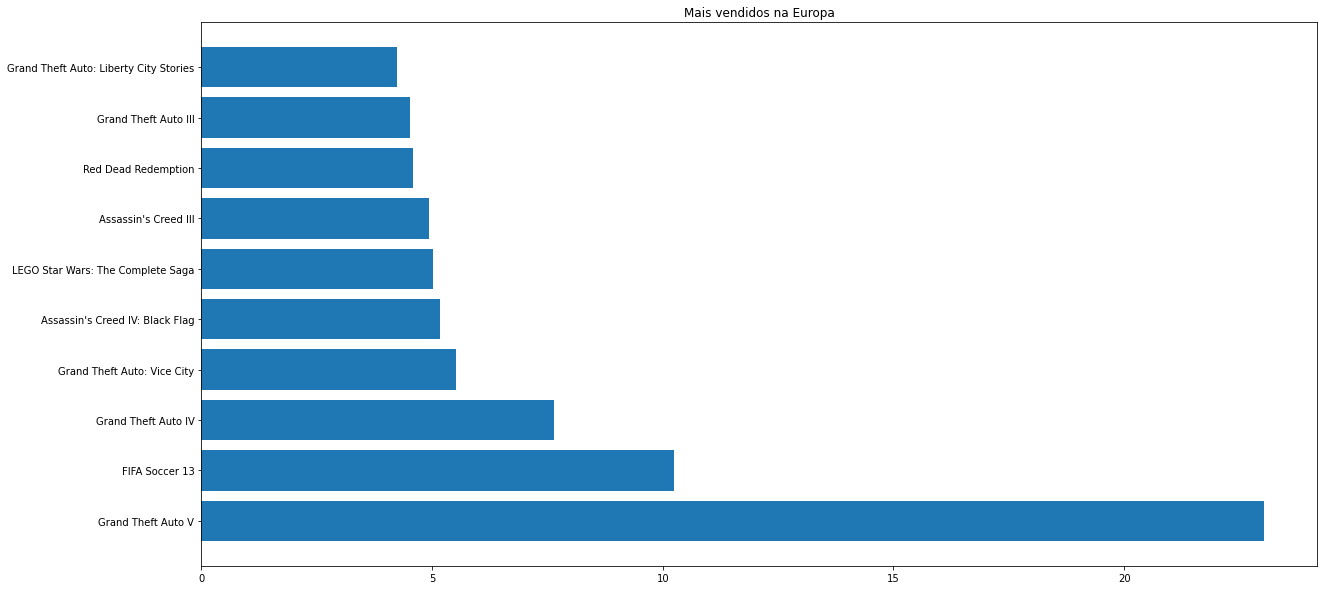

In [87]:
x = top10_eu['Name']
y = top10_eu['EU_Sales']
fig = plt.figure(figsize=(20,10))
plt.barh(x, y, align='center')
plt.plot()
plt.title('Mais vendidos na Europa')
plt.show()